<a href="https://colab.research.google.com/github/meghaaroraa/analyzing-covid-19-data/blob/main/Analyzing_Covid_19_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading CSV file using Pandas

In [2]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7d28146c99c0>)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('italy-covid-daywise.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [ ]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Here's what we can tell by looking at the dataframe:

* The file provides four day-wise counts for COVID-19 in Italy
* The metrics reported are new cases, deaths, and tests
* Data is provided for 248 days: from Dec 12, 2019, to Sep 3, 2020

Some basic information about the data frame can be viewed using the .info method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


It appears that each column contains values of a specific data type. The .describe() method can be used to view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values).

In [ ]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The `columns` property contains the list of columns within the data frame.

In [ ]:
df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

The `shape` property retrieves the number of rows and columns in the data frame

In [ ]:
df.shape

(248, 4)

# Retrieving data from a data frame

In [ ]:
df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties.

In [ ]:
type(df['new_cases'])

pandas.core.series.Series

Retrieving a specific value with a series using the indexing notation `[]`, like arrays

In [ ]:
df['new_cases'][200]

231.0

Using the `.at` method to retrieve the element at a specific row.

In [ ]:
df.at[200, 'new_cases']

231.0

Accessing a subset of the data frame with just the given column names by passing a list of columns within the indexing notation `[]`

In [ ]:
cases_df = df[['date','new_cases']]

In [ ]:
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


Using the `.loc` method to access a specific row of data

In [ ]:
df.loc[200]

date          2020-07-18
new_cases          231.0
new_deaths          11.0
new_tests        27569.0
Name: 200, dtype: object

In [ ]:
type(df.loc[200])

pandas.core.series.Series

Using the `.head` and `.tail` methods to view the first or last few rows of the data frame

In [ ]:
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [ ]:
df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Locating missing or unkown values in the data frame

In [ ]:
df.at[0, 'new_tests']

nan

In [ ]:
type(df.at[0, 'new_tests'])

numpy.float64

Finding the first index that does not contain a `NaN` value by using the `.first_valid_index` method

In [ ]:
df.new_tests.first_valid_index()

111

Using the `.sample` method to retreive sample of rows from the data frame

In [ ]:
df.sample(10)

,date,new_cases,new_deaths,new_tests
109,2020-04-18,3493.0,575.0,NaN
78,2020-03-18,3526.0,347.0,NaN
108,2020-04-17,3786.0,525.0,NaN
0,2019-12-31,0.0,0.0,NaN
77,2020-03-17,4000.0,347.0,NaN
179,2020-06-27,255.0,30.0,29721.0
72,2020-03-12,2313.0,196.0,NaN
105,2020-04-14,3153.0,564.0,NaN
178,2020-06-26,296.0,34.0,28331.0
37,2020-02-06,0.0,0.0,NaN


# Analysis data from data frame

Finding the total number of reported cases and deaths related to Covid-19 in Italy

In [ ]:
total_cases = df.new_cases.sum()

In [ ]:
total_deaths = df.new_deaths.sum()

In [ ]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


In [ ]:
death_rate = total_deaths / total_cases

In [ ]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


Finding the total number of tests conducted, given that, a total of 935310 tests were conducted before daily test numbers were reported

In [ ]:
initial_tests = 935310

In [ ]:
total_tests = initial_tests + df.new_tests.sum()

In [ ]:
total_tests

5214766.0

Finding the fraction of tests which returned a positive result

In [ ]:
positive_rate = total_cases / total_tests

In [ ]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


# Quering rows

Finding days which had more than 1000 reported cases.

In [ ]:
high_new_cases = df.new_cases > 1000

In [ ]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

Using these boolean values to select a subset of rows from the original data frame. All rows corresponding to the `True` values in the series will be displayed

In [ ]:
df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Creating a data frame using these values

In [ ]:
high_cases_df = df[df.new_cases > 1000]

In [ ]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Finding days which have a greater posivity rate than the overall positivity rate

In [ ]:
high_ratio_df = df[df.new_cases / df.new_tests > positive_rate]

In [ ]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


Adding a column in the data frame

In [ ]:
df['positive_rate'] = df.new_cases / df.new_tests

In [ ]:
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


Removing coloumns from the dataset using the `.drop` method

In [ ]:
df.drop(columns=['positive_rate'], inplace=True)

In [ ]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


#Sorting rows

Sorting rows by a specific column using `.sort_values`

In [ ]:
df.sort_values('new_cases', ascending=False).head()

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN


In [ ]:
df.sort_values('new_cases').head()

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN


Count of new cases on 20th June 2020 was `-148`, which is a negative number. Since the number of cases cannot be negative, it could be a data entry error, or the government may have issued a correction to account for miscounting in the past.

In [ ]:
df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


The following approaches can be used for dealing with missing or faulty values:

1. Replace it with `0`
2. Replace it with the average of the entire column
3. Replace it with the average of the values of the previous and next date
4. Discard the row entirely

In [ ]:
df.at[172, 'new_cases'] = (df.at[171, 'new_cases'] + df.at[173, 'new_cases'])/2

In [ ]:
df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


# Analysing dates

In [6]:
df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

Converting data type of `date` column from `object` to `datetime` using the `pd.to_datetime` method.

In [7]:
df['date'] = pd.to_datetime(df.date)

In [8]:
df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Extracting different parts of the date into separate columns using the `DatetimeIndex` class.

In [9]:
df['year'] = pd.DatetimeIndex(df.date).year

In [10]:
df['month'] = pd.DatetimeIndex(df.date).month

In [11]:
df['day'] = pd.DatetimeIndex(df.date).day

In [12]:
df['weekday'] = pd.DatetimeIndex(df.date).weekday

In [13]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Calculating the overall metrics for the month of May

In [14]:
df_may = df[df.month == 5]

In [16]:
df_may_metric = df_may[['new_cases','new_deaths','new_tests']]

In [17]:
may_totals = df_may_metric.sum()

In [18]:
may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Checking whether the number of cases reported on Sundays is higher than the number of cases reported every day using the `.mean` method.

In [19]:
overal_average = df.new_cases.mean()

In [20]:
overal_average

1094.8185483870968

In [21]:
sunday_average = df[df.weekday == 6].new_cases.mean()

In [22]:
sunday_average

1247.2571428571428

In [23]:
sunday_average > overal_average

True

# Grouping and Aggregation

Summarizing the day-wise data to create a new dataframe with month-wise data using the `groupby` function.

In [26]:
df_month = df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [27]:
df_month

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


Aggregating data by using other measure like mean.

In [28]:
df_month_mean = df.groupby('month')[['new_cases','new_tests','new_deaths']].mean()

In [29]:
df_month_mean

,new_cases,new_tests,new_deaths
month,,,
1,0.096774,NaN,0.000000
2,30.517241,NaN,0.724138
3,3253.258065,NaN,373.225806
4,3395.066667,38144.636364,536.366667
5,937.838710,34797.419355,182.516129
6,259.066667,27678.466667,46.800000
7,216.838710,25732.000000,12.516129
8,679.354839,35442.064516,11.129032
9,1099.000000,54395.000000,6.666667


Using the `cumsum` method to find the running of cummulative sum of cases, tests or deaths up to each row's date.

In [31]:
df['total_cases'] = df.new_cases.cumsum()

In [33]:
df['total_tests'] = df.new_tests.cumsum()

In [34]:
df['total_deaths'] = df.new_deaths.cumsum()

In [35]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,4182478.0,35473.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,4225061.0,35477.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,4279456.0,35483.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,NaN,35491.0


#Merging data from multiple sources

Using another file named `location.csv` which contains health-related information for various countries, including Italy.

In [36]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv',
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7d27da8ee980>)

In [37]:
locations_df = pd.read_csv('locations.csv')

In [38]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [39]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [40]:
df['location'] = 'Italy'

In [41]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,4182478.0,35473.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,4225061.0,35477.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,4279456.0,35483.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,NaN,35491.0,Italy


Adding columns from `locations_df` into `df` using the `.merge` method.

In [43]:
merged_df = df.merge(locations_df, on='location')

In [44]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,4182478.0,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,4225061.0,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,4279456.0,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,NaN,35491.0,Italy,Europe,60461828.0,83.51,3.18,35220.084


Calculating metrics like cases per million, deaths per million, and tests per million.

In [45]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [46]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [47]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [48]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,4182478.0,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,4225061.0,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,4279456.0,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,NaN,35491.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN


# Plotting data using Pandas

Plotting a line graph showing how the number of daily cases varies over time using the `.plot` method.

<Axes: >

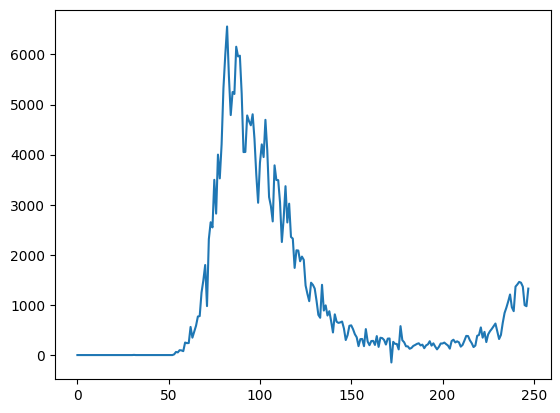

In [49]:
merged_df.new_cases.plot()

Using the `date` column as the index for the data frame.

In [50]:
merged_df.set_index('date', inplace=True)

In [52]:
merged_df

,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,4182478.0,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,69175.513516
2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,4225061.0,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,69879.809125
2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,4279456.0,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,70779.467667


<Axes: xlabel='date'>

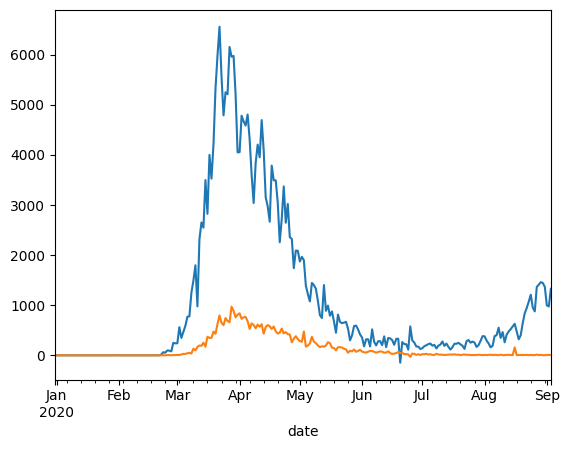

In [53]:
merged_df.new_cases.plot()
merged_df.new_deaths.plot()

Comparing total cases vs. total deaths.

<Axes: xlabel='date'>

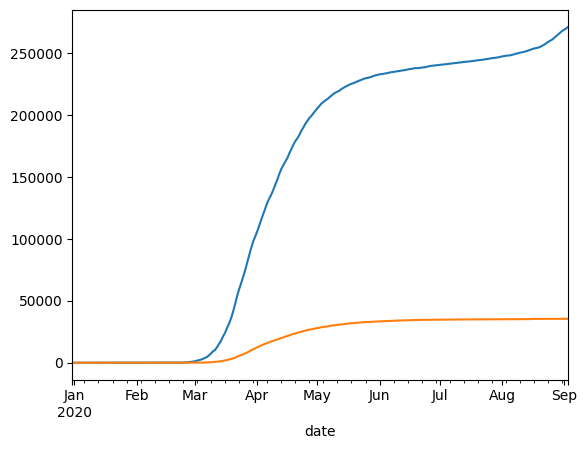

In [54]:
merged_df.total_cases.plot()
merged_df.total_deaths.plot()

Finding how the death rate and positive testing rates vary over time.

In [56]:
death_rate = merged_df.total_deaths / merged_df.total_cases

<Axes: title={'center': 'Death Rate'}, xlabel='date'>

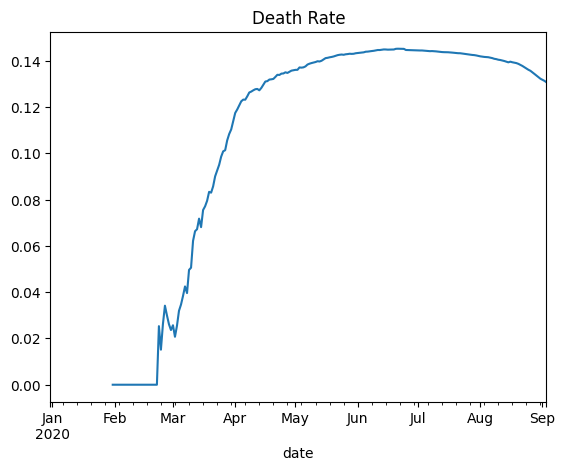

In [59]:
death_rate.plot(title='Death Rate')

In [60]:
positive_rate = merged_df.total_cases / merged_df.total_tests

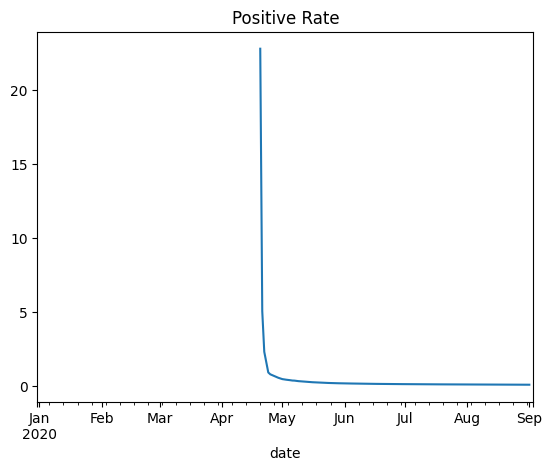

In [62]:
positive_rate.plot(title='Positive Rate');

Plotting month-wise data using a bar chart to visualize the trend.

<Axes: xlabel='month'>

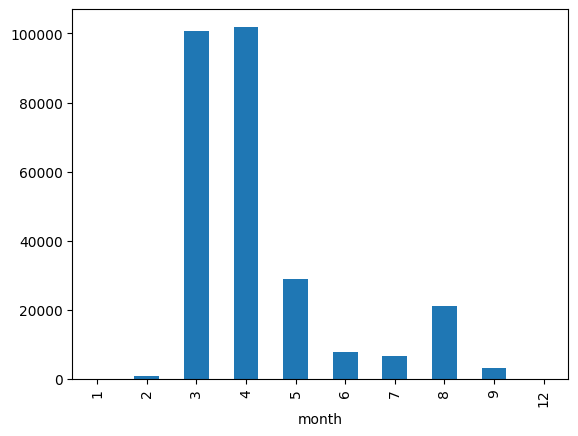

In [63]:
df_month.new_cases.plot(kind='bar')

<Axes: xlabel='month'>

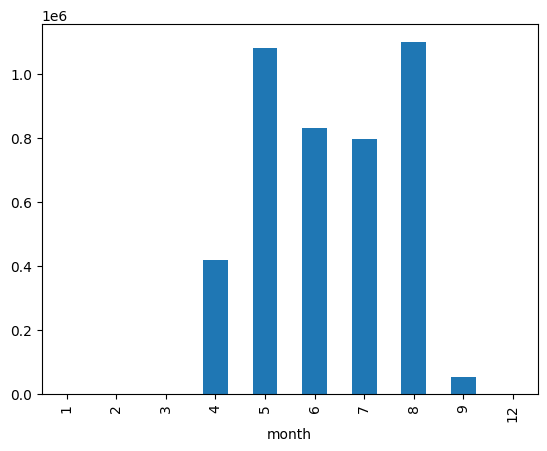

In [65]:
df_month.new_tests.plot(kind='bar')